...................................................
Testing test_interp()...
done.
Testing interp_1D()....
done.
Testing interp_2D()....
done.
Testing bilinear interpolation of an image...
done.
Plotting and saving results...
Do not forget to close the plot window --- it happens:) 


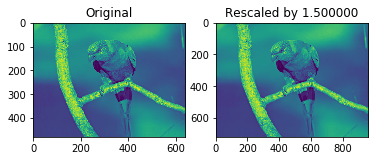

done.


In [4]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt


def test_interp():
    # Tests the interp() function with a known input and output
    # Leads to error if test fails

    x = np.array([1, 2, 3, 4, 5, 6, 7, 8])
    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    x_new = np.array((0.5, 2.3, 3, 5.45))
    y_new_solution = np.array([0.2, 0.46, 0.6, 0.69])
    y_new_result = interp(y, x, x_new)
    np.testing.assert_almost_equal(y_new_solution, y_new_result)


def test_interp_1D():
    # Test the interp_1D() function with a known input and output
    # Leads to error if test fails

    y = np.array([0.2, 0.4, 0.6, 0.4, 0.6, 0.8, 1.0, 1.1])
    y_rescaled_solution = np.array([
        0.20000000000000001, 0.29333333333333333, 0.38666666666666671,
        0.47999999999999998, 0.57333333333333336, 0.53333333333333333,
        0.44000000000000006, 0.45333333333333331, 0.54666666666666663,
        0.64000000000000001, 0.73333333333333339, 0.82666666666666677,
        0.91999999999999993, 1.0066666666666666, 1.0533333333333335,
        1.1000000000000001
    ])
    y_rescaled_result = interp_1D(y, 2)
    np.testing.assert_almost_equal(y_rescaled_solution, y_rescaled_result)


def test_interp_2D():
    # Tests interp_2D() function with a known and unknown output
    # Leads to error if test fails

    matrix = np.array([[1, 2, 3], [4, 5, 6]])
    matrix_scaled = np.array([[1., 1.4, 1.8, 2.2, 2.6, 3.],
                              [2., 2.4, 2.8, 3.2, 3.6, 4.],
                              [3., 3.4, 3.8, 4.2, 4.6, 5.],
                              [4., 4.4, 4.8, 5.2, 5.6, 6.]])

    result = interp_2D(matrix, 2)
    np.testing.assert_almost_equal(matrix_scaled, result)


def interp(y_vals, x_vals, x_new):
    # Computes interpolation at the given abscissas
    #
    # Inputs:
    #   x_vals: Given inputs abscissas, numpy array
    #   y_vals: Given input ordinates, numpy array
    #   x_new : New abscissas to find the respective interpolated ordinates, numpy
    #   arrays
    #
    # Outputs:
    #   y_new: Interpolated values, numpy array

    ################### PLEASE FILL IN THIS PART ###############################
    
    i = 0
    y_new = np.zeros(len(x_new))
    val_dict = dict(zip(x_vals, y_vals))
    for x in x_new:
        # search for the neighbor values of x
        sorted_x_vals = sorted(x_vals, key=lambda x_val: abs(x-x_val))
        if (sorted_x_vals[0] < x and sorted_x_vals[1] > x) or (sorted_x_vals[0] > x and sorted_x_vals[1] < x):
            y_new[i] = (sorted_x_vals[1] - x) / (sorted_x_vals[1] - sorted_x_vals[0]) * val_dict[sorted_x_vals[0]] \
            + (x - sorted_x_vals[0]) / (sorted_x_vals[1] - sorted_x_vals[0]) * val_dict[sorted_x_vals[1]]
        else :
            y_new[i] = val_dict[sorted_x_vals[0]]
        i += 1
    
    return y_new


def interp_1D(signal, scale_factor):
    # Linearly interpolates one dimensional signal by a given saling fcator
    #
    # Inputs:
    #   signal: A one dimensional signal to be samples from, numpy array
    #   scale_factor: scaling factor, float
    #
    # Outputs:
    #   signal_interp: Interpolated 1D signal, numpy array

    ################### PLEASE FILL IN THIS PART ###############################

    leng = len(signal)
    new_leng = int(leng * scale_factor)

    old_y_vals = signal
    old_x_vals = np.arange(1, leng+1)

    new_x_vals = np.linspace(1, leng, new_leng)
    signal_interp = interp(old_y_vals, old_x_vals, new_x_vals)
    
    return signal_interp


def interp_2D(img, scale_factor):
    # Applies bilinear interpolation using 1D linear interpolation
    # It first interpolates in one dimension and passes to the next dimension
    #
    # Inputs:
    #   img: 2D signal/image (grayscale or RGB), numpy array
    #   scale_factor: Scaling factor, float
    #
    # Outputs:
    #   img_interp: interpolated image with the expected output shape, numpy array

    ################### PLEASE FILL IN THIS PART ###############################

    img_shape = img.shape
    row_nbr = img_shape[0]
    col_nbr = img_shape[1]
    img2 = np.zeros((int(row_nbr * scale_factor), col_nbr))
    img_interp = np.zeros((int(row_nbr * scale_factor), int(col_nbr * scale_factor)))
    # print(img_shape)
    # print(scale_factor)
    if(len(img_shape) == 2): # Greyscale image
        # print(img2.shape)
        for col in range(col_nbr):
            img2[:, col] = interp_1D(img[:, col], scale_factor)
            # print(img2)
        for row in range(img2.shape[0]):
            img_interp[row, :] = interp_1D(img2[row, :], scale_factor)
            # print(img_interp)
    elif(len(img_shape) == 3): # RGB image
        img2 = np.stack((img2, img2, img2), 2)
        img_interp = np.stack((img_interp, img_interp, img_interp), 2)
        for col in range(col_nbr):
            img2[:, col, 0] = interp_1D(img[:, col, 0], scale_factor) # Red
            img2[:, col, 1] = interp_1D(img[:, col, 1], scale_factor) # Green
            img2[:, col, 2] = interp_1D(img[:, col, 2], scale_factor) # Blue
            # print(img2)
        for row in range(img2.shape[0]):
            img_interp[row, :, 0] = interp_1D(img2[row, :, 0], scale_factor) # Red
            img_interp[row, :, 1] = interp_1D(img2[row, :, 1], scale_factor) # Green
            img_interp[row, :, 2] = interp_1D(img2[row, :, 2], scale_factor) # Blue
    
    return img_interp


# set arguments
filename = 'bird.jpg'
# filename = 'butterfly.jpg'
# filename = 'monkey_face.jpg'
scale_factor = 1.5  # Scaling factor

# Before trying to directly test the bilinear interpolation on an image, we
# test the intermediate functions to see if the functions that are coded run
# correctly and give the expected results.

print('...................................................')
print('Testing test_interp()...')
test_interp()
print('done.')

print('Testing interp_1D()....')
test_interp_1D()
print('done.')

print('Testing interp_2D()....')
test_interp_2D()
print('done.')

print('Testing bilinear interpolation of an image...')
# Read image as a matrix, get image shapes before and after interpolation
img = (plt.imread(filename)).astype('float')  # need to convert to float
in_shape = img.shape  # Input image shape

# Apply bilinear interpolation
img_int = interp_2D(img, scale_factor)
print('done.')

# Now, we save the interpolated image and show the results
print('Plotting and saving results...')
plt.figure()
plt.imshow(img_int.astype('uint8'))  # Get back to uint8 data type
filename, _ = os.path.splitext(filename)
plt.savefig('{}_rescaled.jpg'.format(filename))
plt.close()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img.astype('uint8'))
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img_int.astype('uint8'))
plt.title('Rescaled by {:2f}'.format(scale_factor))
print('Do not forget to close the plot window --- it happens:) ')
plt.show()

print('done.')
